# Optimal Stimulus

This section computes the optimal level of public expenditure for any given current unemployment rate by using the sufficient-statistics formula.

In [1]:
# %load setup.py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as mtick

## Calculating Optimal Stimulus

First, we load the calibrated parameter values from our previous section.

In [2]:
%%capture
%run calibration.ipynb

We now calculate optimal stimulus with the following equation:

                $\frac{g/c - (g/c)^*}{(g/c)^*} \approx \frac{z_0 \epsilon m}{1 + z_1 z_0\epsilon m^2}\cdot \frac{u_0 - \bar{u}}{\bar{u}}.$          [![Generic badge](https://img.shields.io/badge/MS19-Eq%2023-purple?logo=read-the-docs)](https://www.pascalmichaillat.org/6.html)  

In [3]:
# This function calculates the optimal government spending to private consumption ratio
GC_func = lambda M, eta, epsilon, u0:z0*epsilon*m_func(M, eta)/(1 + z1*z0*epsilon*m_func(M, eta)**2)*(u0-u_bar)/u_bar * GC_bar + GC_bar
# This functio ncomputes the optimal government spending as percentage of GDP. 
stim_func = lambda M, eta, epsilon, u0:GY_func(GC_func(M, eta, epsilon, u0)) - GY_bar

Setting $u_0 = 9\%$ and $\eta = 0.6$, let's look at what the optimal stimulus is for different $M$'s and $\epsilon$'s:

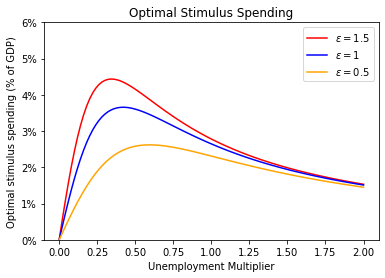

In [4]:
u0 = 0.09
stim_vals = stim_func(M_vals, eta, epsilon, u0)
stim_vals_h = stim_func(M_vals, eta, epsilon_h, u0)
stim_vals_l = stim_func(M_vals, eta, epsilon_l, u0)
stim_range = pd.DataFrame(index=M_vals,
                          data={f'$\epsilon = ${epsilon_h}':stim_vals_h, 
                                f'$\epsilon = ${epsilon}':stim_vals,
                                f'$\epsilon = ${epsilon_l}':stim_vals_l})
stim_range_ax = stim_range.plot(title=r"Optimal Stimulus Spending", color=['red', 'blue', 'orange'])
stim_range_ax.set(xlabel='Unemployment Multiplier', ylabel='Optimal stimulus spending (% of GDP)', ylim=(0, 0.06))
stim_range_ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))